In [ ]:
from brian2 import *
%matplotlib inline

start_scope()


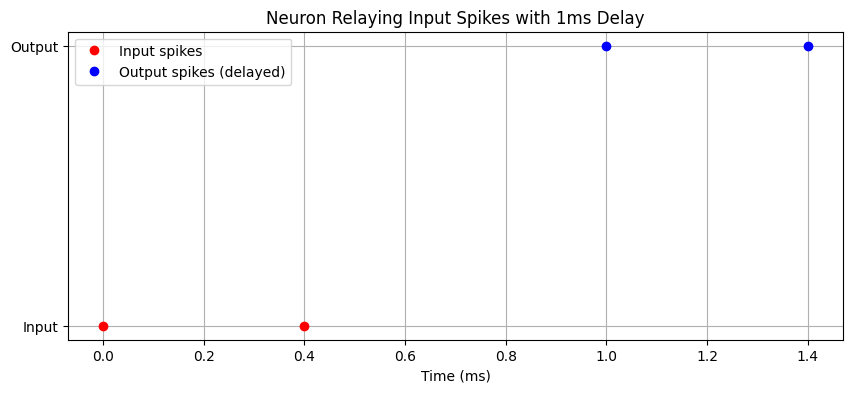

In [19]:
from brian2 import *

start_scope() # clears previous inputs

# example of input from start of the ms and a second that cares the value (.5 in this case)
input_times = [0*ms, .4*ms]

#^^ looks like .9 is higest to detect

input_indices = [0, 0] #so it knows that neuron spikes at which time 
# right now however only 1 so we stick to 0, 0 as only 1 neuron

input_group = SpikeGeneratorGroup(1, input_indices, input_times)


# why when change .5 to 1 it skips inital spike? 
output = NeuronGroup(1, 'v:1', threshold='v>.5', reset='v=0', method='exact')

# Synapse with 1ms delay
syn = Synapses(input_group, output, on_pre='v += 1')
syn.connect()
syn.delay = .9*ms  # this is delay in reponse -- however it aprear to be 1.1 delay --- ? 

# Monitors
spike_mon_in = SpikeMonitor(input_group)
spike_mon_out = SpikeMonitor(output)

# times it runs
run(2*ms)

# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
plt.plot(spike_mon_in.t/ms, [0]*len(spike_mon_in.t), 'ro', label='Input spikes')
plt.plot(spike_mon_out.t/ms, [1]*len(spike_mon_out.t), 'bo', label='Output spikes (delayed)')
plt.yticks([0, 1], ['Input', 'Output'])
plt.xlabel('Time (ms)')
plt.title('Neuron Relaying Input Spikes with 1ms Delay')
plt.legend()
plt.grid(True)
plt.show()


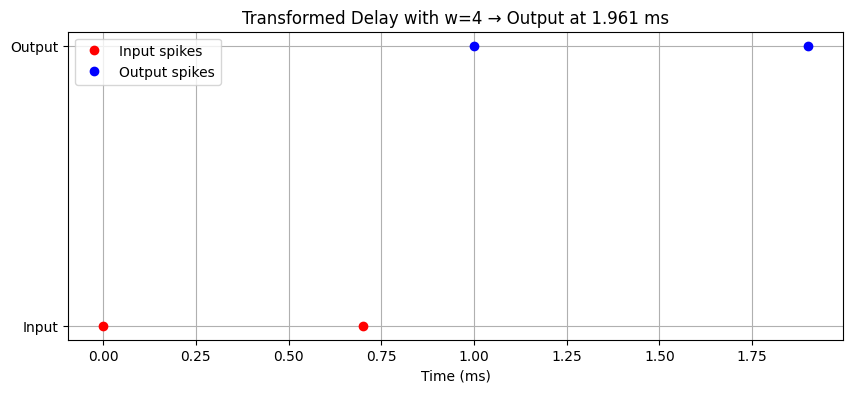

In [24]:
from brian2 import *
import numpy as np
import matplotlib.pyplot as plt

start_scope() # clears previous inputs

# ---------------------------
# Step 1: Define the input
# ---------------------------
input_times = [0*ms, 0.7*ms]
input_indices = [0, 0]
input_group = SpikeGeneratorGroup(1, input_indices, input_times)

# ---------------------------
# Step 2: Define function
# ---------------------------
def weighted_delay(x, w):
    # Normalized to [0,1], avoid divide-by-zero
    x = np.clip(x, 1e-6, 1 - 1e-6)
    return 1 / (1 + ((1 - x) / x) ** np.exp(w / 3))

# ---------------------------
# Step 3: Process spike delay
# ---------------------------
# Calculate delay between first and second spike (in ms)
t0 = input_times[0] / ms
t1 = input_times[1] / ms
delta = t1 - t0  # 0.4

# Normalize the delay to [0,1] range
# Assuming max expected delay = 1.0 ms for now
x = delta / 1.0
w = 4 # as per your example

# Apply transformation
new_delay = weighted_delay(x, w) * ms  # new delay, scaled back to ms

# ---------------------------
# Step 4: Create output spike group
# ---------------------------
# First output always at 1.0 ms
# Second output at 1.0 + new delay
output_times = [1.0*ms, 1.0*ms + new_delay]
output_indices = [0, 0]
output_group = SpikeGeneratorGroup(1, output_indices, output_times)

# ---------------------------
# Step 5: Monitor and plot
# ---------------------------
spike_mon_in = SpikeMonitor(input_group)
spike_mon_out = SpikeMonitor(output_group)

run(2*ms)

plt.figure(figsize=(10, 4))
plt.plot(spike_mon_in.t/ms, [0]*len(spike_mon_in.t), 'ro', label='Input spikes')
plt.plot(spike_mon_out.t/ms, [1]*len(spike_mon_out.t), 'bo', label='Output spikes')
plt.yticks([0, 1], ['Input', 'Output'])
plt.xlabel('Time (ms)')
plt.title(f"Transformed Delay with w={w} → Output at {output_times[1]/ms:.3f} ms")
plt.legend()
plt.grid(True)
plt.show()


In [117]:
from brian2 import *

start_scope()

def inputs(values):
    '''creates and returns input_times and input_indices '''

    n = len(values)

    input_times = (2*n)*[0*ms] # all set to zero next is to move all values given into spikes
    input_indices = []
    for i in range(n):
        input_times[n+i] = values[i]*ms

    for i in range(n): # setting frist half that are all zeros to 0,1,2ect same thing with next half to fit format of above
        input_indices.append(i)
    for i in range(n):
        input_indices.append(i)

    return input_times, input_indices

# l1 = [.4, .7, .9]
# It = []
# Ii = []
# It, Ii = inputs(l1)
# print(It, Ii)


def weighted_delay(x, w):     # look on desmos for cool example of function
    x = np.clip(x, 1e-6, 1 - 1e-6)
    return 1 / (1 + ((1 - x) / x) ** np.exp(w / 3)) # 3 choosen beucase it is the closest whole number close to a straght line when w = 1


def cheating_self_calculating(input_times, weights, temporal_bias):
    '''words here'''

    n = int(len(input_times)/2)

    neurons_delta = []
    delays = []

    for i in range(n):
        neurons_delta.append((input_times[n+i] - input_times[i])/ ms) 
        #print(neurons_delta)
    

    for i in range(n):
        delays.append(weighted_delay((neurons_delta[i]/ 1.0), weights[i]) * ms )

    output_times = (2*n)*[temporal_bias]

    for i in range(n):
     
        output_times[n+i] += delays[i]

    
    #output indices are the same as in the input so no change for now  # also as keeping the same number of in and out here
    return output_times


# l1 = [.4, .7, .9]
# It = []
# Ii = []
# It, Ii = inputs(l1)
# #print(It, Ii)

# temportal_bias = 1*ms
# weights = [1,2,4] 


# output_times = cheating_self_calculating(It, weights, temportal_bias)

# print(output_times)




[1.36218985 1.5        1.8232029 ] Hz
[2. * msecond, 2.56179758 * msecond]
inputs: [0.4, 0.5, 0.6] 
 Outputs of the 3n: [1.   1.   1.   1.36 1.5  1.82] Hz <--- ignore that 
 Output of final [2. * msecond, 2.56179758 * msecond]


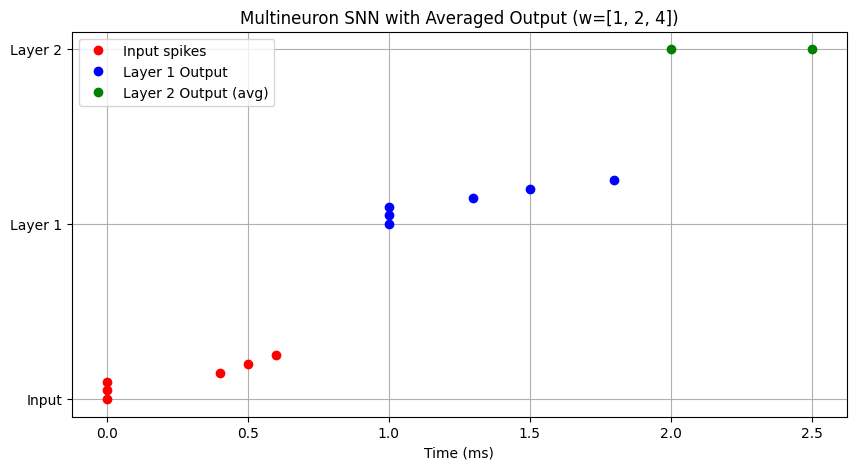

In [150]:
# two neurons -- will try to condence so easly multiplible

from brian2 import *
import numpy as np
import matplotlib.pyplot as plt

start_scope()

neurons = 3
test_values = [.4, .5, .6]
input_times, input_indices = inputs(test_values)

input_group = SpikeGeneratorGroup(neurons, input_indices, input_times)

temporal_bias = 1*ms
weights = [1,2,4] 

output_times = cheating_self_calculating(input_times, weights, temporal_bias)
output_indices = input_indices

output_group = SpikeGeneratorGroup(neurons, output_indices, output_times)

#print(output_times)
# 🧠 Second-layer neuron that takes average of outputs
avg_time = float(np.mean(output_times[int(len(output_times) /2):])/ms)  # Only delayed (second) spike from each neuron\
print(output_times[int(len(output_times) /2):]/ms)
#print(float(avg_time/ms))

output_val = [temporal_bias*2, avg_time*ms + temporal_bias]
print(output_val)
final_output_group = SpikeGeneratorGroup(1, [0, 0], output_val)


spike_mon_in = SpikeMonitor(input_group)
spike_mon_out = SpikeMonitor(output_group)
spike_mon_final = SpikeMonitor(final_output_group)

print(f"inputs: {test_values} \n Outputs of the 3n: {np.round(output_times / ms, 2)} <--- ignore that \n Output of final {output_val}" )


run(3*ms)

# 🎨 Visual plot
plt.figure(figsize=(10, 5))

# Inputs
input_y = 0 + 0.05 * np.arange(len(spike_mon_in.t))
plt.plot(spike_mon_in.t/ms, input_y, 'ro', label='Input spikes')

# Outputs
output_y = 1 + 0.05 * np.arange(len(spike_mon_out.t))
plt.plot(spike_mon_out.t/ms, output_y, 'bo', label='Layer 1 Output')

# Final output (avg)
plt.plot(spike_mon_final.t/ms, [2]*len(spike_mon_final.t), 'go', label='Layer 2 Output (avg)')

plt.yticks([0, 1, 2], ['Input', 'Layer 1', 'Layer 2'])
plt.xlabel('Time (ms)')
plt.title(f"Multineuron SNN with Averaged Output (w={weights})")
plt.legend()
plt.grid(True)
plt.show()



Input neuron spikes: [20 27]
Hidden neuron spikes: [6 6]
Output neuron spikes: [6]


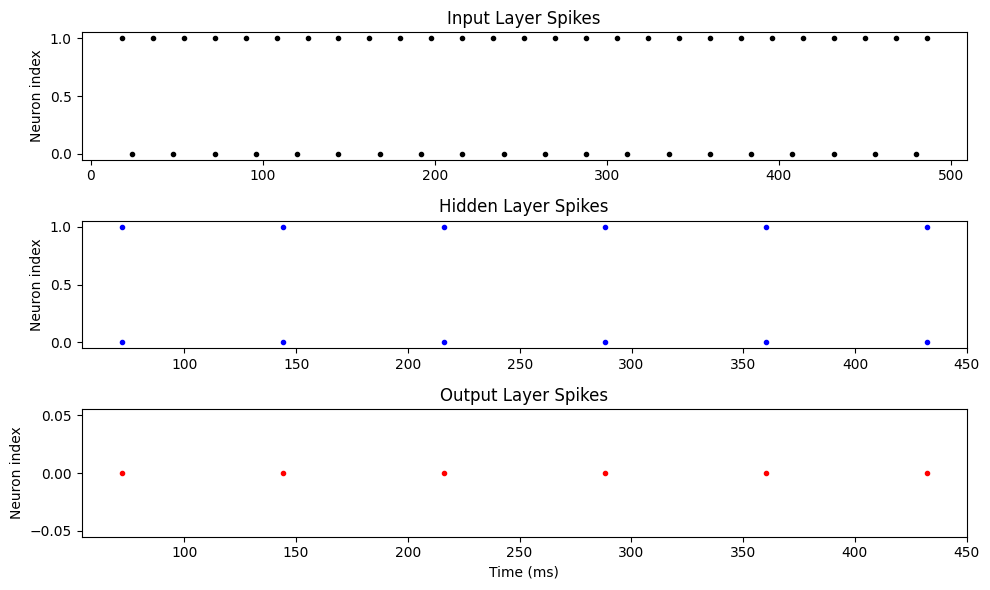

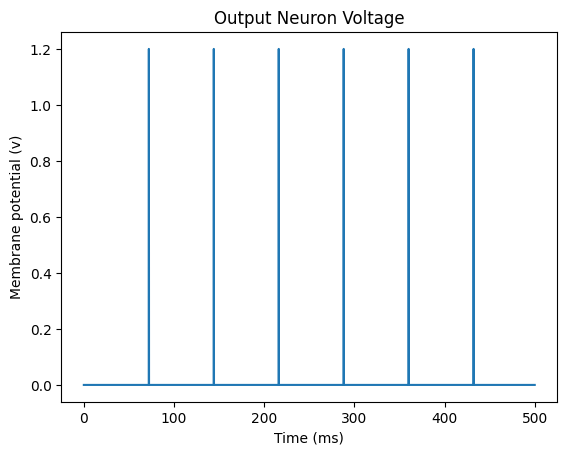

In [ ]:
# an actually complete example from GPT
from brian2 import *

# ----------------------------
# Setup simulation environment
# ----------------------------
start_scope()
defaultclock.dt = 0.1*ms  # simulation time resolution

# Optional: use numpy instead of compiling with Cython
prefs.codegen.target = "numpy"

# ----------------------------
# Neuron Model (LIF)
# ----------------------------
# Equation: simple LIF model with input current I
eqs = '''
dv/dt = (I - v) / (10*ms) : 1  # Membrane potential
I : 1                          # Input current (can vary per neuron)
'''

# ----------------------------
# Input Layer (2 neurons)
# ----------------------------
input_layer = NeuronGroup(2, eqs, threshold='v > 1', reset='v = 0', method='linear')
input_layer.I = [1.1, 1.2]  # Give both neurons enough current to spike

# ----------------------------
# Hidden Layer (2 neurons)
# ----------------------------
hidden_layer = NeuronGroup(2, eqs, threshold='v > 1', reset='v = 0', method='linear')
hidden_layer.I = 0  # Starts at zero — receives spikes from input layer

# ----------------------------
# Output Layer (1 neuron)
# ----------------------------
output_layer = NeuronGroup(1, eqs, threshold='v > 1', reset='v = 0', method='linear')
output_layer.I = 0  # Will be driven by spikes from hidden layer

# ----------------------------
# Synaptic Connections
# ----------------------------

# Input → Hidden
# Every input neuron connects to every hidden neuron
syn_input_hidden = Synapses(input_layer, hidden_layer, on_pre='v_post += 0.5')
syn_input_hidden.connect()  # fully connected (all-to-all)

# Hidden → Output
syn_hidden_output = Synapses(hidden_layer, output_layer, on_pre='v_post += 0.6')
syn_hidden_output.connect()  # again, fully connected

# ----------------------------
# Monitors to record activity
# ----------------------------
# Record spikes
spike_mon_input = SpikeMonitor(input_layer)
spike_mon_hidden = SpikeMonitor(hidden_layer)
spike_mon_output = SpikeMonitor(output_layer)

# Optionally record membrane voltage
v_mon_output = StateMonitor(output_layer, 'v', record=True)

# ----------------------------
# Run simulation
# ----------------------------
run(500*ms)

# ----------------------------
# Print results
# ----------------------------
print("Input neuron spikes:", spike_mon_input.count[:])
print("Hidden neuron spikes:", spike_mon_hidden.count[:])
print("Output neuron spikes:", spike_mon_output.count[:])

# ----------------------------
# Plotting
# ----------------------------
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Raster plot of spikes from each layer
plt.subplot(3, 1, 1)
plt.title("Input Layer Spikes")
plt.plot(spike_mon_input.t/ms, spike_mon_input.i, '.k')
plt.ylabel("Neuron index")

plt.subplot(3, 1, 2)
plt.title("Hidden Layer Spikes")
plt.plot(spike_mon_hidden.t/ms, spike_mon_hidden.i, '.b')
plt.ylabel("Neuron index")

plt.subplot(3, 1, 3)
plt.title("Output Layer Spikes")
plt.plot(spike_mon_output.t/ms, spike_mon_output.i, '.r')
plt.xlabel("Time (ms)")
plt.ylabel("Neuron index")

plt.tight_layout()
plt.show()

# Plot membrane potential of the output neuron
plt.figure()
plt.plot(v_mon_output.t/ms, v_mon_output.v[0])
plt.title("Output Neuron Voltage")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane potential (v)")
plt.show()
